In [1]:
#importing libraries


!pip install geopy
import pandas as pd
import numpy as np
#import zipcodes as zcode
import matplotlib.pyplot as mtpl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as Lda
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler as sc 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from statsmodels.multivariate.manova import MANOVA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import seaborn as sns
import scipy.stats as stats 

# EXPLORATORY DATA ANALYSIS

In [2]:
#importing data set

data = pd.read_excel(r"C:\Users\Praneeth\Desktop\ASA\DATA SET.xlsx")
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,46,20,73,93106,1,1.5,2,128,0,0,0,1,0
1,43,19,75,90041,3,0.3,3,0,0,0,0,0,0
2,32,7,55,91301,4,2.0,2,0,0,0,0,1,0
3,28,2,51,94720,4,1.8,3,0,0,0,0,0,1
4,33,6,78,90250,4,2.0,2,119,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,35,191,93407,4,5.6,3,0,1,0,0,0,0
996,54,30,194,92056,3,6.0,3,587,1,1,1,1,1
997,30,6,64,94305,4,3.4,1,117,0,0,0,0,0
998,39,14,74,94305,3,3.0,1,0,0,0,0,0,0


In [3]:
#checking for null values
print(data.isnull().sum())

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [4]:
data = data.drop(['ZIP Code'],axis = 1)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,46,20,73,1,1.5,2,128,0,0,0,1,0
1,43,19,75,3,0.3,3,0,0,0,0,0,0
2,32,7,55,4,2.0,2,0,0,0,0,1,0
3,28,2,51,4,1.8,3,0,0,0,0,0,1
4,33,6,78,4,2.0,2,119,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,35,191,4,5.6,3,0,1,0,0,0,0
996,54,30,194,3,6.0,3,587,1,1,1,1,1
997,30,6,64,4,3.4,1,117,0,0,0,0,0
998,39,14,74,3,3.0,1,0,0,0,0,0,0


In [5]:
#Now we use the Personal Loan as the Target Variable.
#Defining X and Y variables according to the condition given

x = data.drop(['Personal Loan'],axis = 1)
y = data['Personal Loan']

x.shape,y.shape

((1000, 11), (1000,))

In [6]:
#using train-test split procedure to estimate the performance of model.


x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 11), (200, 11), (800,), (200,))

In [7]:
#seperating categorical and numerical variables

#x_train data
x_train_catg = x_train[['Family','Education']]
x_train_numr = x_train[['Age','Experience' ,'Income','CCAvg','Mortgage']]
x_train_data = x_train.drop(['Family','Education','Age','Experience' ,'Income','CCAvg','Mortgage'],axis = 1)    

#x_test data
x_test_catg = x_test[['Education','Family']]
x_test_numr = x_test[['Age','Experience','Income','CCAvg','Mortgage']]
x_test_data = x_test.drop(['Age','Experience','Income','CCAvg','Mortgage','Education','Family'],axis = 1)

x_train_numr.shape, x_train_catg.shape, x_train_data.shape, x_test_numr.shape, x_test_catg.shape, x_test_data.shape

((800, 5), (800, 2), (800, 4), (200, 5), (200, 2), (200, 4))

Scaling numerical and categorical variables

In [8]:
x_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
993,31,5,28,1,0.3,1,0,0,0,1,1
859,49,23,59,3,2.1,1,0,0,0,0,0
298,65,41,121,2,2.1,1,0,0,0,1,0
553,31,7,81,2,2.0,2,0,0,1,1,1
672,33,7,81,2,4.5,3,187,0,1,1,1


In [9]:
#standardizing numerical variables


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#x_train data
x_train_sc = sc.fit_transform(x_train_numr)
x_train_sc = pd.DataFrame(x_train_sc, columns = ['Age','Experience','Income','CCAvg','Mortgage'])


#x_test data

x_test_sc = sc.fit_transform(x_test_numr)
x_test_sc = pd.DataFrame(x_test_sc, columns = ['Age','Experience','Income','CCAvg','Mortgage'])


#checking current shape of array
x_train_sc.shape ,x_test_sc.shape

((800, 5), (200, 5))

In [10]:
#normalising categorical variables using one hot encoding 

#x_train data
x_train_norm = pd.get_dummies(x_train_catg, columns = ['Family','Education'])

#x_test data
x_test_norm = pd.get_dummies(x_test_catg, columns = ['Family','Education'])

x_train_norm.shape,x_test_norm.shape

((800, 7), (200, 7))

In [11]:
#megre normalised data ( catergorical ) standarised data ( numerical ) remaining data ( x_train_data, x_test_data)

x_train_data_final = pd.concat([x_train_norm.reset_index(drop=True),x_train_sc.reset_index(drop=True),x_train_data.reset_index(drop=True)],axis = 1)

x_test_data_final = pd.concat([x_test_norm.reset_index(drop=True),x_test_sc.reset_index(drop=True),x_test_data.reset_index(drop=True)],axis = 1)

x_train_data_final.shape,x_test_data_final.shape

((800, 16), (200, 16))

# Part 1: Discriminant Analysis

# QUESTION 1.
Build a Discriminant Analysis Model to predict whether the person is likely to accept the bank’s offer for a personal loan. If necessary, create new variables to improve the model performance.

In [12]:
lda = Lda(n_components = 1) 
x_train_lda = lda.fit_transform(x_train_data_final, y_train)
x_train_lda

array([[ 3.93210792e-01],
       [-2.83611072e-01],
       [ 6.48268276e-01],
       [ 7.36156105e-01],
       [ 6.10154427e-02],
       [-4.97954119e+00],
       [ 6.13365614e-01],
       [-2.61413399e-01],
       [ 1.25546649e+00],
       [-1.33884321e+00],
       [-6.84793462e-01],
       [ 1.18788584e-01],
       [-3.39994396e-01],
       [-5.07184891e+00],
       [ 1.74917408e-03],
       [-2.99787683e+00],
       [-3.10528123e+00],
       [-9.40632014e-01],
       [-3.93518446e-01],
       [ 1.65448932e+00],
       [-1.09943473e-01],
       [ 1.24196579e+00],
       [-5.64687850e-01],
       [ 2.46450399e+00],
       [ 8.40857637e-01],
       [-7.02779099e-01],
       [ 5.99671573e-01],
       [-1.29543937e-02],
       [-6.15817089e-01],
       [ 5.27447728e-01],
       [ 2.36062142e-01],
       [ 8.99260655e-01],
       [ 7.05146718e-01],
       [ 1.13389672e+00],
       [ 5.49601445e-01],
       [-1.53336914e+00],
       [ 1.55047098e-01],
       [-4.43269337e-01],
       [ 7.4

In [13]:
#prediction  

y_pred = lda.predict(x_test_data_final)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [14]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [15]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [16]:
data.columns = [c.replace(' ', '_') for c in data.columns]


# QUESTION 2. 
Carry out significance tests using Wilk’s Lambda

In [17]:
#wilk's lambda can be studied with propoability and wilks value
#wilks lambda ranges from 0-1 , the more complex if the value reached to 1 ,the less complex if the value is near to 'ZERO'


# add the intercept
#data['Personal Loan'] = ['a' + str(x) for x in data['Personal_Loan']]

#fit manova #considering all independent variables
manova_result = MANOVA.from_formula('Age+Experience+Income+Family+CCAvg+Education+Mortgage+Securities_Account+CD_Account+Online+CreditCard~Personal_Loan',data)
print(manova_result.mv_test())

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept         Value    Num DF  Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda   0.0024 11.0000 988.0000 38112.0582 0.0000
         Pillai's trace   0.9976 11.0000 988.0000 38112.0582 0.0000
 Hotelling-Lawley trace 424.3245 11.0000 988.0000 38112.0582 0.0000
    Roy's greatest root 424.3245 11.0000 988.0000 38112.0582 0.0000
-------------------------------------------------------------------
                                                                   
--------------------------------------------------------------------
      Personal_Loan       Value    Num DF   Den DF   F Value  Pr > F
--------------------------------------------------------------------
           Wilks' lambda  0.5939  11.0000  988.0000  61.4126  0.00

Wilks' lamda model value being less than 0.05 states that a small lambda occurs when within-groups variability is small compared to the total variability.Hence variables are significant.

# QUESTION3.
Comment on the variables that are significant

In [18]:
# add the intercept
data['Personal Loan'] = ['a' + str(x) for x in data['Personal_Loan']]
#fit manova #checking variables (multivarite analysis is performed so we take 2 variables)
manova_result = MANOVA.from_formula('Age+Income~ Personal_Loan',data)
print(manova_result.mv_test())


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0543 2.0000 997.0000 8688.6059 0.0000
         Pillai's trace  0.9457 2.0000 997.0000 8688.6059 0.0000
 Hotelling-Lawley trace 17.4295 2.0000 997.0000 8688.6059 0.0000
    Roy's greatest root 17.4295 2.0000 997.0000 8688.6059 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       Personal_Loan      Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.7334 2.0000 997.0000 181.2474 0.0000
           Pillai's trace 0.2666 2.0000 997.0

Comment :

Since the wilk lambda value is > 0.05 ,income is a significant variable and has influence over personal loan    
    

In [19]:
# add the intercept 
data['Personal Loan'] = ['a' + str(x) for x in data['Personal_Loan']]
#fit manova
manova_result = MANOVA.from_formula('Age+Experience+Income~ Personal_Loan',data)
print(manova_result.mv_test())

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF    F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda   0.0024 3.0000 996.0000 136337.6109 0.0000
         Pillai's trace   0.9976 3.0000 996.0000 136337.6109 0.0000
 Hotelling-Lawley trace 410.6555 3.0000 996.0000 136337.6109 0.0000
    Roy's greatest root 410.6555 3.0000 996.0000 136337.6109 0.0000
-------------------------------------------------------------------
                                                                   
--------------------------------------------------------------------
      Personal_Loan       Value   Num DF   Den DF   F Value   Pr > F
--------------------------------------------------------------------
           Wilks' lambda  0.7322  3.0000  996.0000  121.4382  0.00

variables are insignificant

In [20]:
# add the intercept
data['Personal Loan'] = ['a' + str(x) for x in data['Personal_Loan']]
#fit manova #checking variables (multivarite analysis is performed so we take 2 variables)
manova_result = MANOVA.from_formula('Age+Education~ Personal_Loan',data)
print(manova_result.mv_test())


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0517 2.0000 997.0000 9135.0631 0.0000
         Pillai's trace  0.9483 2.0000 997.0000 9135.0631 0.0000
 Hotelling-Lawley trace 18.3251 2.0000 997.0000 9135.0631 0.0000
    Roy's greatest root 18.3251 2.0000 997.0000 9135.0631 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Personal_Loan      Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.9922 2.0000 997.0000  3.9405 0.0197
            Pillai's trace 0.0078 2.0000 997.

# QUESTION 4.
Create the confusion matrix and comment on the prediction accuracy.

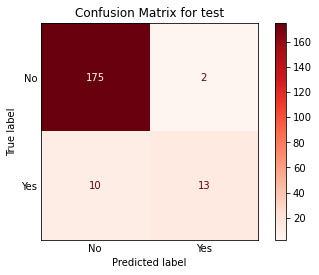

In [21]:
fig, ax = mtpl.subplots(1, 1)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
disp.plot(cmap='Reds',colorbar=True,ax=ax)
ax.set_title('Confusion Matrix for test')
mtpl.tick_params(axis=u'both', which=u'both',length=0)
mtpl.grid(b=None,axis='both',which='both',visible=False)
mtpl.show()

In [22]:
#check for accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94

In [23]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred, average=None)

array([0.98870056, 0.56521739])

In [24]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.94594595, 0.86666667])

This implies are accuracy of identifying loan status is 94% right.

# QUESTION 5.
The bank would like to address the top 30 persons with an offer for personal loan
based on the probability (propensity). Create a table displaying all the details of the
“top” 30 persons who are most likely to accept the bank’s offer. Make sure to
include the probability of accepting the offer along with all the other details.

In [25]:
probability = lda.predict_proba(x_test_data_final)[:,1]  
a = pd.DataFrame({'probability':probability})
final_model_1 = pd.concat([x_test.reset_index(drop=True),a],axis = 1)
final_model_1 = final_model_1.sort_values(by='probability',ascending=False)
final_model_1.head(30)
#final_model_1.to_clipboard()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,probability
52,61,36,184,4,2.3,2,342,0,1,1,1,0.999964
41,54,30,194,3,6.0,3,587,1,1,1,1,0.999907
59,56,32,173,1,4.6,2,88,0,1,1,0,0.999723
179,37,12,194,4,0.2,3,211,1,1,1,1,0.999709
22,38,13,169,1,6.8,3,0,0,1,1,1,0.998662
189,36,12,150,4,5.4,1,0,1,1,1,0,0.971145
81,38,13,119,1,3.3,2,0,0,1,1,1,0.934563
34,26,2,171,3,6.0,2,0,0,0,1,0,0.899333
141,56,30,111,4,0.3,1,372,1,1,1,0,0.872374
49,30,5,98,4,1.8,3,129,1,1,1,1,0.813866


# Part 2: Logistic Regression

# QUESTION 1
Build a logistic regression equation to predict whether the person is likely to accept the bank’s offer for a personal loan. If necessary, create new variables to improve the model performance.

In [26]:
# A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.
model = LogisticRegression(random_state=0)
x_train_log = model.fit(x_train_data_final, y_train)
print(' Personal Loan (yes or no / 0 or 1 ) Binary form:', x_train_log.classes_)
print(' Intercept :',x_train_log.intercept_)
print(' Coefficients :',x_train_log.coef_)

 Personal Loan (yes or no / 0 or 1 ) Binary form: [0 1]
 Intercept : [-3.19474344]
 Coefficients : [[-0.62415589 -1.04097256  0.61535543  1.04811348 -1.38020673  0.52219747
   0.85634972  0.1343337  -0.08230283  2.2497211   0.06813401  0.19052073
  -0.66347851  1.9847788  -0.47907282 -1.12747107]]


In [27]:
import statsmodels.api as sm

sm_model = sm.Logit(y_train,sm.add_constant(x_train))
result = sm_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.136052
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                  0.5742
Time:                        21:56:24   Log-Likelihood:                -108.84
converged:                       True   LL-Null:                       -255.64
Covariance Type:            nonrobust   LLR p-value:                 1.947e-56
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.1263      4.181     -3.140      0.002     -21.321      -4.932
Age  

C:\Users\Praneeth\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
#Analysing the Model
y_pred = model.predict(x_test_data_final)
y_pred = pd.DataFrame(y_pred, columns = ['Predicted Personal Loan_LR'])
y_pred

,Predicted Personal Loan_LR
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,0
198,0


In [29]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.965


In [30]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[176,   1],
       [  6,  17]], dtype=int64)

In [31]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98       177\n           1       0.94      0.74      0.83        23\n\n    accuracy                           0.96       200\n   macro avg       0.96      0.87      0.90       200\nweighted avg       0.96      0.96      0.96       200\n'

# QUESTION 2
Carry out the omnibus test to test whether the model as a whole is significant. Comment on the result of the omnibus test.

In [32]:
## Calculating  the G-stats from Logistic regression Summary Table

G_stats = -2*((-108.84)/(-256.64))
print(G_stats)
import scipy
from scipy.stats import chi2



chi2.pdf(-0.636,12)

-0.8481920199501247


0.0

p < 0.05 ,hence the model is significant

# QUESTION 3
Test the hypothesis that βj = 0 for all βj, where βj indicates the coefficient corresponding to jth explanatory variable. Comment on the result of thes hypothesis tests.

In [33]:
result.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                         chi2        P>chi2  df constraint
const                9.857187  1.691696e-03              1
Age                  0.088798  7.657104e-01              1
Experience           0.082159  7.743923e-01              1
Income              65.624867  5.454615e-16              1
Family              18.429562  1.763016e-05              1
CCAvg                0.023288  8.787106e-01              1
Education           28.524486  9.252099e-08              1
Mortgage             0.431651  5.111801e-01              1
Securities Account   4.033249  4.461196e-02              1
CD Account          15.338890  8.984773e-05              1
Online               2.967996  8.492697e-02              1
CreditCard           9.810892  1.734814e-03              1

In [34]:
#building the model

logistic_reg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.141853
         Iterations 9


In [35]:
# Conduct a Wald test for equality of multiple coefficients

x_vars = logistic_reg.summary2().tables[1].index
wald_str = ' = '.join(list(x_vars[6:-1]))
print(wald_str)
wald_test = logistic_reg.wald_test(wald_str) # joint test
print(wald_test)

Mortgage = Securities Account = CD Account = Online
<Wald test (chi2): statistic=[[19.24524365]], p-value=0.00024326189943249874, df_denom=3>


# QUESTION 5
The bank would like to address the top 30 persons with an offer for personal loan based on the probability (propensity). Create a table displaying all the details of the “top” 30 persons who are most likely to accept the bank’s offer. Make sure to include the probability of accepting the offer along with all the other details.

In [36]:
probability = model.predict_proba(x_test_data_final)[:,1]  
b = pd.DataFrame({'probability':probability})
final_model_2 = pd.concat([x_test.reset_index(drop=True),b],axis = 1)
final_model_2 = final_model_2.sort_values(by='probability',ascending=False)
final_model_2.head(30)
#final_model_2.to_clipboard()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,probability
41,54,30,194,3,6.0,3,587,1,1,1,1,0.995526
52,61,36,184,4,2.3,2,342,0,1,1,1,0.993890
179,37,12,194,4,0.2,3,211,1,1,1,1,0.992227
59,56,32,173,1,4.6,2,88,0,1,1,0,0.973189
34,26,2,171,3,6.0,2,0,0,0,1,0,0.924936
22,38,13,169,1,6.8,3,0,0,1,1,1,0.920882
189,36,12,150,4,5.4,1,0,1,1,1,0,0.784953
172,56,30,158,4,6.1,1,0,0,0,0,0,0.731016
144,42,18,153,3,5.6,1,416,0,0,0,0,0.722018
12,50,24,133,4,1.4,2,342,0,0,0,1,0.703703


# QUESTION 4
Carry out the hypothesis test that the model fits the data. Comment on the results.

In [37]:
# Making reduced model with statsmodel
# Statsmodel Logistic regression
reduced_attributes = [ "Experience", "Income", "CCAvg", "Family",'Education','CreditCard']
model= sm.Logit(y_train, x_train[reduced_attributes])
red_result_sm_lg = model.fit(method='newton')

y_pred_sm_lg = (red_result_sm_lg.predict(x_train[reduced_attributes]) >= 0.5).astype(int)
confusion_mat_sm_lg = red_result_sm_lg.pred_table()



print(red_result_sm_lg.summary())
print("** ** "*15)
print(red_result_sm_lg.summary2())

Optimization terminated successfully.
         Current function value: 0.323428
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                  800
Model:                          Logit   Df Residuals:                      794
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                -0.01212
Time:                        21:56:24   Log-Likelihood:                -258.74
converged:                       True   LL-Null:                       -255.64
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Experience    -0.0704      0.011     -6.607      0.000      -0.091      -0.050
Income         0.0130      0.

In [38]:
red_default_ll = red_result_sm_lg.llf
print(f"Reduced model Log likelihood : {red_default_ll}")

Reduced model Log likelihood : -258.74235696838724


In [39]:
#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(red_default_ll)

print(f"Chi-Squared test-statistic : {LR_statistic}")

Chi-Squared test-statistic : 517.4847139367745


In [40]:
#calculate p-value of test statistic using 2 degrees of freedom
p_val = stats.chi2.sf(LR_statistic, 2)

print(f"P value : {p_val}")

P value : 4.262085267547921e-113


# QUESTION 6
Compare the above list of 30 persons against the 30 persons obtained from Discriminant Analysis (part 1). Comment on the similarities and dissimilarities.

In [41]:
top_30_customer_comparision = pd.DataFrame(np.array([final_model_2.index, final_model_1.index]).T, columns = ["Logistic regression", "Lda"])
top_30_customer_comparision
#top_30_customer_comparision.to_clipboard()

,Logistic regression,Lda
0,41,52
1,52,41
2,179,59
3,59,179
4,34,22
...,...,...
195,35,100
196,123,7
197,7,32
198,0,0
